<a href="https://colab.research.google.com/github/johnbeasley1998/NINEworkshop/blob/master/Tutorial_ShapesNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center; color:navy";> Shapes Neural Network </h1>

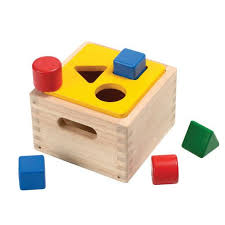  



<h2 style="text-align:left; color:SeaGreen";>  Table of Contents </h2>
 
1. [Classifiers](#one)

2. [Intro](#two)

3. [Neural Netoworks](#three)
   
4 [Building our Neural Network](#four)
    <br> 7.1 [Imports and Objectives](#four1)
    <br> 7.2 [Importing Data](#four2) 
    <br> 7.3 [Define Neural Network](#four3)
    <br> 7.4 [Define Loss Function and Optimizer](#four4)
    <br> 7.5 [Training Loop](#four5)
    <br> 7.6 [Model Evaluation](#four6)


<h2 style="text-align:left; color:SeaGreen";> Classifiers
<a id="one"></a>

   <p style="text-indent: 50px; font-size:16px;">Classification, in machine learning terms, is the act of taking an input, and grouping it with other like inputs. These groups of similar inputs are called 'Classes' and assigning an input to a class is 'Classifying'. <p>

  <p style="text-indent: 50px; font-size:16px;"> A more digestable way to look at it would be that you give the machine examples of what something is, and it takes these examples and tries to find patterns that help it identify other instances of this thing. <p>

   <p style="text-indent: 50px; font-size:16px;"> Give it 100 pictures of dogs and tell it that those are dogs. Give it 100 pictures of a washing machine and tell it those are washing machines. The idea is that with the 100 examples of each thing, the AI can build an understanding of what a 'dog' looks like and what a 'washing machine' looks like, and it calls these labels 'classes'. You can now give the AI a new picture of either thing and hope that the has enough information to know what it is without you telling it. Below you can find an article that gives some useful info on classifiers, namely what types of data they can use as inputs. Reading it in full will not be pertenent for this notebook, but scrolling through can give some idea of what types of problems can be solved by a classifier. <p>

In [ ]:
#Website Display Don't Edit
from IPython.display import IFrame
IFrame('https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.', width=1000, height=600)


<h2 style="text-align:left; color:SeaGreen";> Shapes Neural Network Intro </h2> 
<a id="two"></a>

<p style="text-indent: 50px; font-size:16px;">The classifier that will be built throughout the length of this notebook will be able to classify shapes. Cirlces, squares, triangles, and stars will be our target shapes and thus we will make four classes out of them. This will be like using the toy seen below the title of this notebook, only OUR baby is the best damn shape knowing child in history. 



<p style="text-indent: 50px; font-size:16px;">The data set we will use will contain 2400 images of shapes, that is 600 images x our 4 classes. As we mentioned above, we need to give many of these images to our neural network in order for it to learn what each shape looks like. In data science this is very typically called a <b>Training Data Set</b>. It is the portion of the data you give to the algorithm where the class is told to it, and it tries to notice patterns among data in the same classes. These patterns are what help the AI 'know' what each class shape looks like. We also need to reserve a smaller portion of data to test the alroritm on what it has learned. This is often called a <b>Testing Data Set</b>. The classes for the testing portion of data are known to us, but are not told to the AI. We will give the AI a random picture from the testing set, and see if it can classify it under the correct class. The download for the dataset can be found here (INSERT DATA DISTRIBUTION WHEN FIGURED OUT). 


<p style="text-indent: 50px; font-size:16px;">For the best results, you want to try and split your data into the training/testing sets evenly and consistently. <b>For each shape class, we will have 500 pictures for training, and 100 pictures for testing.</b> The folder we downloaded of all the images should look like this in your directory: 
<img src="https://i.imgur.com/4JkxPX9.png" width=200, height = 200> </p>

<p style="text-indent: 50px; font-size:16px;"> Here, there should be 500 images in each folder in the 'train' foler, and 100 images in each folder in the 'valid' folder. <b> Once we have trained our alorithm, hopefully it will be able to put any shape image from the 'valid' folder into the correct class without being told. </b> </p>

<h2 style="text-align:left; color:SeaGreen";> Neural Networks and PyTorch </h2> 
<a id="three"></a>

In [ ]:
<p style="text-indent: 50px; font-size:16px;"> The classifier we have been discussing, and are about to build, will be made using a neural network. Describing it might sound familiar to the description of what a classifier is: it is a system of learning used by the computer to create relationships betweeen inputs and their outputs, and uses these relationships to make predictions on other inputs. The major difference is that a classifier aims to simply organize an input into its correct class, where a neural network in general can make far more complex and un-defined predictions. Classifiers are either right or wrong, where Neural Networks can output probablities on many possible outcomes. Squares are to rectangles what classifiers are neural netowrks. The video below can go into more detail. </p> 

SyntaxError: ignored

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('GvQwE2OhL8I', width=1000, height=500)

<p style="text-indent: 50px; font-size:16px;"> Building an AI requires use of a tool or library in order split the data, train the model, and run tests. There are many libraries to choose from, and choosing the right one is situational. Pytorch is the library that we will use for this specific project, as it is currently the industry standard. </p>

More information on Pytorch can be found on their website [here](https://pytorch.org/). 

<h2 style="text-align:left; color:SeaGreen";> Building our Neural Network </h2>
<a id="four"></a>

<h3 style="color:LightSeaGreen"> Imports and Objectives </h3> 
<a id="four1"></a>

<p style="text-indent: 50px; font-size:16px;"> First, we have to inport all of the relevant packages for our neural network. This can be used as a good copy/paste material for building other neural networks using Pytorch. That being said, the packages you need from the Pytorch library are dependent on your goals, much like deciding upon the Pytorch library to begin with. To know what we need to import, we will create a list of the objectives that will guide our decisions. You don't want to over import too many useless packages as they may slow performance. A basic overview of our goals is as follows: </p>
 
<u> Objectives </u>
- Load the data, separate it into testing and training sets, and convert it to tensors
- Define our neural networks' class, consisting of the init and forward functions 
- Set up an optimizer and fit it to our model 
- Create a loss function that can output our losses to evaluate our model, and plot it
- Run the model throuh X number of epochs until acceptably accurate 

<p style="text-indent: 50px; font-size:16px;"> Now, lets go into a python cell and import all the necessary packages. We will comment on the imports based on what they are used for, but in general this can be re-used and edited for imports on other projects.</p> 


In [ ]:
#Basic Imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import time 

#Neural Network Imports 
import torch #importing pytorch library 
from torch import optim #used to create the optimizer 
from torch.optim import lr_scheduler
from torch.autograd import Variable  
from torch.utils.data import Dataset,DataLoader #help in loading and splitting the data into testing and training sets 

import torch.nn as nn #imports the skeleton (module) of our neural network  
import torch.nn.functional as F #imports the functions we need to create our neural network 

import torchvision #helps importing and preparing the data 
from torchvision import transforms #helps in transfomring the data 
from torchvision import models 
from torchvision import datasets
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder



<h3 style="color:LightSeaGreen">Importing the Data </h3> 
<a id="four2"></a>


<p style="text-indent: 50px; font-size:16px;"> First off, we are going to define a function called simple_transform below. This will be used as a way to import our data in a methodology that the computer can 'see'. This means creating a [tensor](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html
) which will consist of layers of numbers that represent sections of the picture. </p>

<p style="text-indent: 50px; font-size:16px;"> Note the resize function that is changing the picture to 64X64 and the 'To.Tensor()' function in the code that is, predictably, transforming the pictures to tensors. </p>


In [ ]:
simple_transform = transforms.Compose([transforms.Resize((64, 64))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])

<p style="text-indent: 50px; font-size:16px;">  Now, with the tansform function in hand, we are going to load the data into their respective training and testing sets. You must access the images as they exist in your directory. Placing your cursor over the folders in your files, right clicking, and picking properties can show you the path to your images. The second python cell will confirm that our data has been converted to the tensors. </p>

In [ ]:
train = ImageFolder('D:/nine2020/images-sample/images/train', simple_transform)
valid = ImageFolder('D:/nine2020/images-sample/images/valid', simple_transform)

FileNotFoundError: ignored

In [ ]:
train[0][0]

<p style="text-indent: 50px; font-size:16px;">Because of the way we divided our images into folders, we have primed PyTorch to automatically identify the classes of each image based on the folder names. Here you can see the class names as we see them, then as the numbers the computer sees them. Converting the classes to numbers makes the tasks easier on the computer, and this is called 'indexing'. 

In [ ]:
train.classes

train.class_to_idx

for key, value in train.class_to_idx.items():
    print("Class: {!s}  Value: {!s}".format(key, value))

NameError: ignored

<h3 style="color:LightSeaGreen"> Defining Neural Network </h3> 
<a id="four3"></a>

<p style="text-indent: 50px; font-size:16px;"> Now that our data is ready, we need to define our neural network. This will done by creating a class called 'net'. This class will contain two functions that the network will use to move data through its levels of convolution. The init function creates the layers of convolution for the netowrk to run through. The forward function defines how the data will go through these levels. At the bottom of our class definition we will create a new model of this class called 'model'. 

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Two convolution kernels
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(3380, 50)
        self.fc2 = nn.Linear(50,4)
        

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        return F.log_softmax(x, dim=1)
    
    
model = Net()


<h3 style="color:LightSeaGreen"> Defining the Optimizer and Loss Function </h3> 
<a id="four4"></a>

<p style="text-indent: 50px; font-size:16px;"> When the data runs through the 'net' class created above, we call that one epoch. Every epoch is assesed by a 'loss function' that describes how effectively the network was able to make predictions on the models. The output of the forward function needs to be read, assesed, and ran back through the same net class. Before it can do this, some changes need to be made to the Network's convolutional layers. Namely, there needs to be adjustments to features like the weight and learning rate in the network so that each time the data is run through the 'net' class it has more accurate predictions than the last. This task is done by an 'optimizer' which will be created and defined below. The optimizer uses what is retuned by the loss funtion in order to direct its optimization of the network. 

In [ ]:
lossfun = F.nll_loss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


NameError: name 'model' is not defined

<h3 style="color:LightSeaGreen"> Creating the Training Loop </h3>
<a id="four5"></a>

In [ ]:
<p style="text-indent: 50px; font-size:16px;"> Now we have everything set up to train out model and have it learn what shapes are what. We need to create a loop that will run the data through the net class, calclulate the loss, and optimize the network based on that loss. There is a lot of code in the next cell, but understanding that basic flow of data that has been described is all that matters at the current moment. The data is run through the net() class, a loss function is run on the results, and the optimizer reads that loss and changes the network accordingly. 

In [ ]:
def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(data_loader):
        data, target = Variable(data, volatile), Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = lossfun(output, target)

        #running_loss += F.nll_loss(output, target, size_average=False).data[0]
        running_loss += lossfun(output, target, size_average=False).data
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    loss = running_loss / len(data_loader.dataset)
    accuracy = 100. * running_correct / len(data_loader.dataset)

    print(f'{phase} loss is {loss} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)} = {accuracy}')
    return loss, accuracy

<h3 style="text-align:left; color:LightSeaGreen";> Evaluating the Model </h3> 
<a id="four6"></a>
    
    
<p> Creating the proper lists necessary to run a for loop that will take the model through however many epochs specified. At first, we will try three epochs and see the result the loss function outputs. For a simple neural network such as this one, it would be best to aim for above 95% accuracy on the model. 

In [ ]:
#number of epochs
numofepochs = 3

#loading
train_data_loader = torch.utils.data.DataLoader(train,batch_size=32,num_workers=3,shuffle=True)
valid_data_loader = torch.utils.data.DataLoader(valid,batch_size=32,num_workers=3,shuffle=True)

#defining lists for loss containment 
train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []

#running epochs through 
for epoch in range(1,numofepochs):
    # Train our model
    # Validation
    # Update our lists
    epoch_loss, epoch_accuracy = fit(epoch, model, train_data_loader, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, valid_data_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    
    

plt.plot(range(1, len(train_losses)+1), train_losses, 'bo', label='training loss')
plt.plot(range(1, len(val_losses)+1), val_losses, 'r', label='validation loss')
plt.legend()
plt.show()

<p style="text-indent: 50px; font-size:16px;"> Based on the results from those three epochs, run the block of code again but change the number of epochs to something higher, like 20. 

In [ ]:
#number of epochs
numofepochs = 20

#loading
train_data_loader = torch.utils.data.DataLoader(train,batch_size=32,num_workers=3,shuffle=True)
valid_data_loader = torch.utils.data.DataLoader(valid,batch_size=32,num_workers=3,shuffle=True)

#defining lists for loss containment 
train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []

#running epochs through 
for epoch in range(1,numofepochs):
    # Train our model
    # Validation
    # Update our lists
    epoch_loss, epoch_accuracy = fit(epoch, model, train_data_loader, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, valid_data_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    
    

plt.plot(range(1, len(train_losses)+1), train_losses, 'bo', label='training loss')
plt.plot(range(1, len(val_losses)+1), val_losses, 'r', label='validation loss')
plt.legend()
plt.show()